## PRCP-1015-EquakeDamagePred

### Problem Statement

Create a predictive model in such a way that the objective is to predict the ordinal variable “damage_grade”. This column presents the level of damage grade affected by the earthquake.

#### Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("Data/train_values.csv")
df1.head(2)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0


In [3]:
pd.set_option('display.max_column',None)

In [4]:
df1.head(2)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df1.shape

(260601, 39)

In [6]:
df2 = pd.read_csv('Data/train_labels.csv')

In [7]:
df2.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [8]:
df = pd.merge(df1,df2,on = 'building_id', how='left')

In [9]:
df.head(2)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2


### Task 1: Data Analysis Report

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [11]:
df.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [12]:
df.describe(include='O')

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
count,260601,260601,260601,260601,260601,260601,260601,260601
unique,3,5,3,5,4,4,10,4
top,t,r,n,f,q,s,d,v
freq,216757,219196,182842,209619,165282,202090,250072,250939


#### Missing Values

In [13]:
df.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

#### Unique Values

In [14]:
df.nunique()

building_id                               260601
geo_level_1_id                                31
geo_level_2_id                              1414
geo_level_3_id                             11595
count_floors_pre_eq                            9
age                                           42
area_percentage                               84
height_percentage                             27
land_surface_condition                         3
foundation_type                                5
roof_type                                      3
ground_floor_type                              5
other_floor_type                               4
position                                       4
plan_configuration                            10
has_superstructure_adobe_mud                   2
has_superstructure_mud_mortar_stone            2
has_superstructure_stone_flag                  2
has_superstructure_cement_mortar_stone         2
has_superstructure_mud_mortar_brick            2
has_superstructure_c

In [15]:
df.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [16]:
df.damage_grade.value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

### Univariate analysis

<Axes: xlabel='geo_level_1_id', ylabel='Count'>

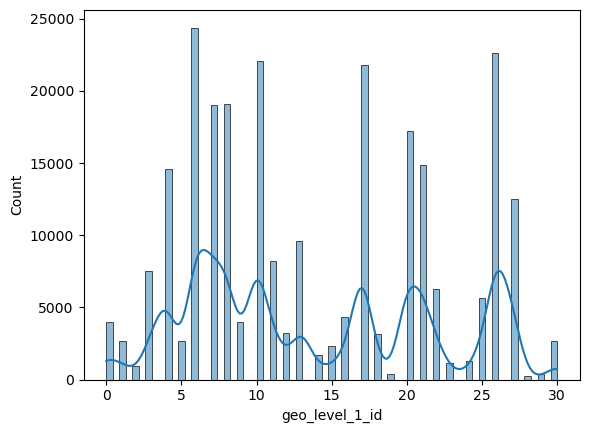

In [17]:
sns.histplot(x='geo_level_1_id',data=df,kde=True)

<Axes: xlabel='geo_level_2_id', ylabel='Count'>

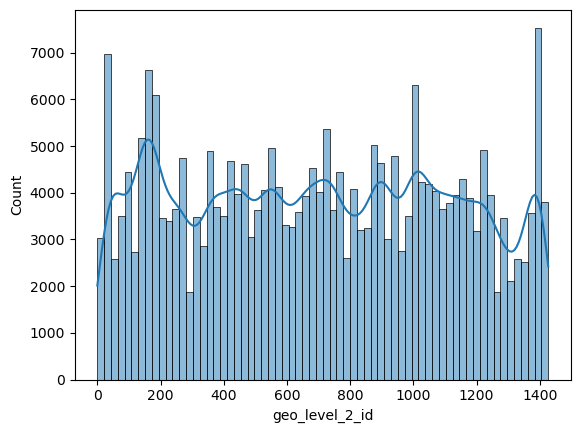

In [18]:
sns.histplot(x='geo_level_2_id',data=df,kde=True)

<Axes: xlabel='geo_level_3_id', ylabel='Count'>

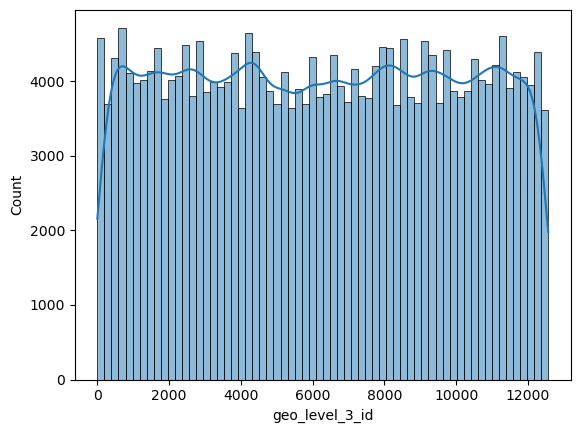

In [19]:
sns.histplot(x='geo_level_3_id',data=df,kde=True)

<Axes: xlabel='age', ylabel='Count'>

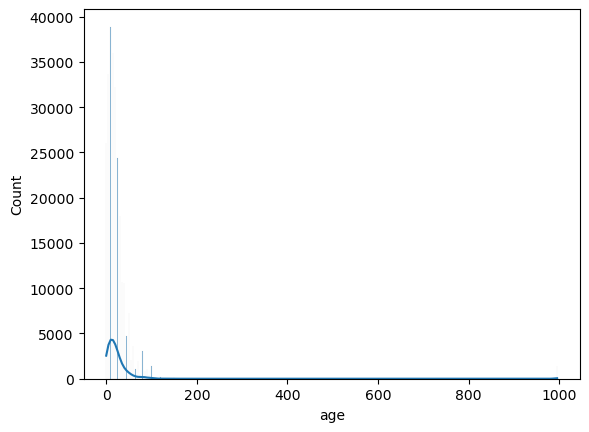

In [20]:
sns.histplot(x='age',data=df,kde=True)

<Axes: xlabel='count_floors_pre_eq', ylabel='Count'>

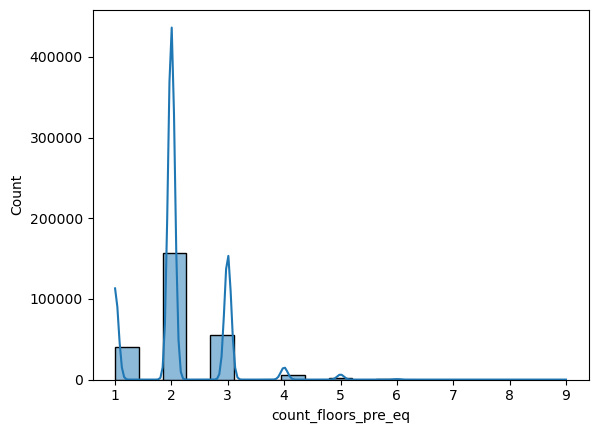

In [21]:
sns.histplot(x='count_floors_pre_eq',data=df,kde=True)

<Axes: xlabel='area_percentage', ylabel='Count'>

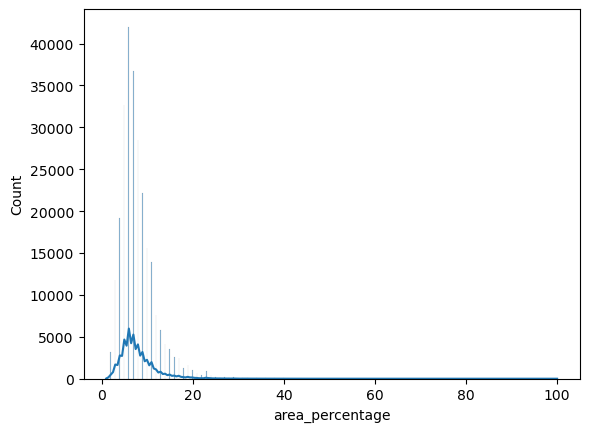

In [22]:
sns.histplot(x='area_percentage',data=df,kde=True)

<Axes: >

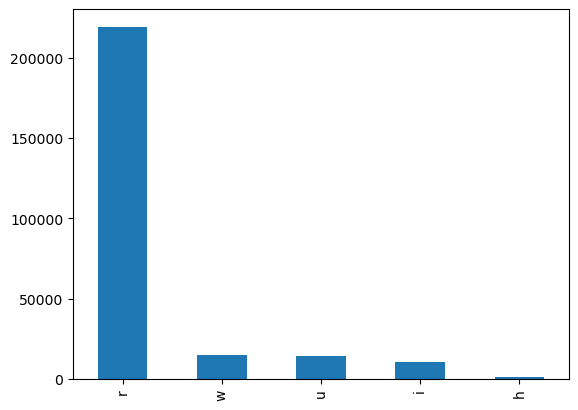

In [23]:
df.foundation_type.value_counts().plot(kind = 'bar')

<Axes: >

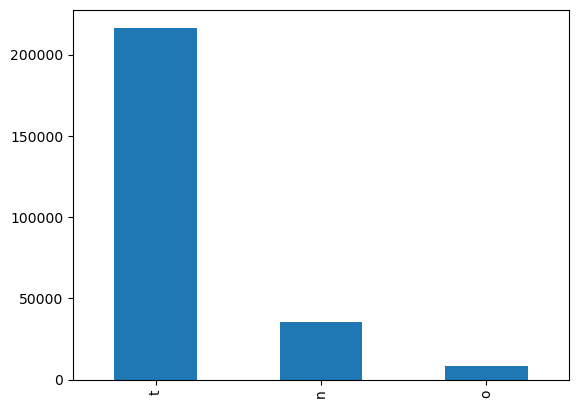

In [24]:
df.land_surface_condition.value_counts().plot(kind = 'bar')

In [25]:
import sweetviz as sv
my_report = sv.analyze(df)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Insights from Univariate analysis

1)	Geo_level_1_id: This feature does not show any trend. The value 7,11,18,27 have highest counts. The value 3, 20,29 have lowest counts.
2)	Geo_level_2_id: This feature show nearly uniform distribution. The values around 200 and 1400 have highest counts.  The values around 300 and 1300 have lowest counts.
3)	Geo_level_3_id: This feature shows nearly uniform distribution across all the values.
4)	Count_floors_pre_eq: The 60% buildings having 2 floors, 21% buildings have 3 floors. 16% buildings have only 1 floor. 2% buildings have 4 floors. Nearly 1% buildings have 5 floors. Building having 6,7,8,9 floors are less than 1%. 
5)	Age – Most of the buildings age is less than 100 years. Some buildings age is between 100 to 200 years. 0.5% buildings age is 995 Years.
6)	Area percentage – Almost all buildings area percentage is under 20%. Few buildings have area percentage above 70%.
7)	Height percentage: 30% buildings height percentage is 6, Most of the building’s height percentage is less than 10. Nearly 1.5% buildings height percentage is between 11 to 32.
8)	Land surface condition: 83% buildings have ‘t’ type land surface condition, 14% buildings have ‘n’ type land surface condition and only 3% buildings have ‘o’ type land surface condition.
9)	Foundation Type: 84% buildings have ‘r’ type foundation, 6% buildings have ‘w’ type foundation, 5% buildings have ‘u’ type foundation, 4% buildings have ‘I’ type foundation and less than 1% buildings have ‘h’ type foundation.
10)	Roof type: 70% buildings have ‘n’ type roof, 24% buildings have ‘q’ type roof and 6% buildings have ‘x’ type roof.
11)	Ground floor type: 80% buildings have ‘f’ type ground floor. 10% buildings have ‘x’ type ground floor. 9% buildings have ‘v’ type ground floor. Less than 1% buildings have ‘z’ and ‘m’ type ground floor.
12)	Other floor type: 63% buildings have ‘q’ type other floors, 17% buildings have ‘x’ type other floors, 15% buildings have ‘j’ type other floors, and 5% buildings have ‘s’ type other floors.
13)	Position: 78% buildings have ‘s’ position, 16% buildings have ‘t’ position, 5% buildings have ‘j’ position and less than 1% buildings have ‘o’ position.
14)	Plan configuration: 96% buildings have ‘d’ type plan configuration, 2% buildings have ‘q’ type plan configuration, 1% buildings have ‘u’ type plan configuration and less than 1% buildings have all other (‘s’, ‘c’, ‘a’, ‘o’ ‘m’, ‘n’, ‘f’) configurations.
15)	Superstructure adobe mud: 9% buildings have adobe mud superstructure.
16)	Superstructure mud mortar stone: 24% buildings have mud mortar stone superstructure.
17)	Superstructure stone flag: 3% buildings have stone flag superstructure.
18)	Superstructure cement mortar stone: 2% buildings have cement mortar stone superstructure.
19)	Superstructure mud mortar brick: 7% buildings have mud mortar brick superstructure.
20)	Superstructure cement mortar brick: 8% buildings have cement mortar brick superstructure.
21)	Superstructure timber: 25% buildings have timber superstructure.
22)	Superstructure bamboo: 9% buildings have bamboo superstructure.
23)	Superstructure rc non engineered: 4% buildings have rc non engineered superstructure.
24)	Superstructure rc engineered: 2% buildings have rc engineered superstructure.
25)	Superstructure other: 1.5% buildings have other type of superstructure.
26)	Ownership status: 96% buildings ownership status is ‘v’, 2% buildings ownership status is ‘a’, 1% buildings ownership status is ‘w’ and less than 1% buildings ownership status is ‘r’.
27)	Count families: 87% buildings family count is 1, 8% buildings family count is 0, 4% buildings family count is 2, and less than 1% buildings family count is between 3 to 9.
28)	Secondary use: 11% buildings have secondary use.
29)	Secondary use agriculture:  6% buildings have secondary use as agriculture.
30)	Secondary use hotel: 3% buildings have secondary use as hotel.
31)	Secondary use rental: Less than 1% buildings have secondary use as rental.
32)	Secondary use institution: Less than 1% buildings have secondary use as institution.
33)	Secondary use school: Less than 1% buildings have secondary use as school.
34)	Secondary use industry: Less than 1% Buildings have secondary use as industry.
35)	Secondary use health post: Less than 1% Buildings have secondary use as health post.
36)	Secondary use gov office: Less than 1% Buildings have secondary use as government office.
37)	Secondary use police: Less than 1% Buildings have secondary use as police station.
38)	Secondary use other: Less than 1% Buildings have secondary use as other.
39)	Damage grade: 57% buildings have grade 2 damage, 33% buildings have grade 3 damage and 10% buildings have grade 1 damage.


### Bivariate Analysis

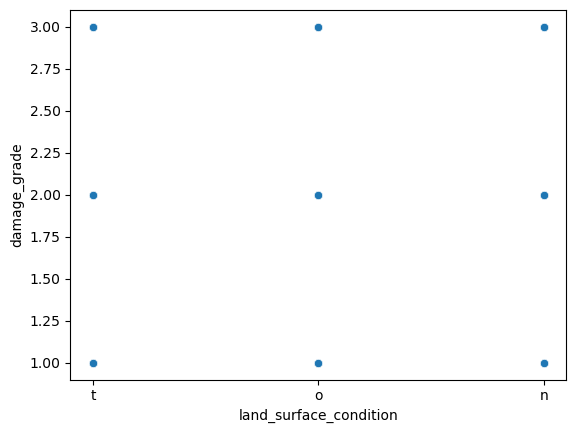

In [25]:
sns.scatterplot(x=df.land_surface_condition,y=df.damage_grade,data=df)
plt.show()

In [26]:
from ipywidgets import interact

In [27]:
cat_col = ['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position','plan_configuration','legal_ownership_status']

In [28]:
@interact
def interactive_plot(column=list(df[['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position','plan_configuration','legal_ownership_status']])):
    plt.figure(figsize=(5,5))   # canvas size
    sns.countplot(x=df[column].dropna(axis=0),hue=df.damage_grade)
    plt.xlabel(column, fontsize=10)  # assigning name to x-axis and increasing it's font size
    plt.ylabel('Count', fontsize=10)  # assigning name to y-axis and increasing it font size
    plt.tight_layout()
    plt.show()

interactive(children=(Dropdown(description='column', options=('land_surface_condition', 'foundation_type', 'ro…

In [29]:
@interact
def plot_continuous(column= list(df.columns.drop(cat_col))):
    plt.figure(figsize=(5,5))
    sns.histplot(x=df[column].dropna(axis=0), hue=df.damage_grade)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.tight_layout()
    plt.show()

interactive(children=(Dropdown(description='column', options=('building_id', 'geo_level_1_id', 'geo_level_2_id…

In [30]:
binary_col = ['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone',
             'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber','has_superstructure_bamboo',
             'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'count_families', 'has_secondary_use',
             'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school',
             'has_secondary_use_industry','has_secondary_use_health_post','has_secondary_use_gov_office','has_secondary_use_use_police', 'has_secondary_use_other']

In [31]:
len(binary_col)

23

In [32]:
@interact
def plot_continuous(column= binary_col):
    plt.figure(figsize=(5,5))
    sns.countplot(x=df[column].dropna(axis=0), hue=df.damage_grade)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.tight_layout()
    plt.show()

interactive(children=(Dropdown(description='column', options=('has_superstructure_adobe_mud', 'has_superstruct…

In [33]:
df.has_secondary_use_school.value_counts()

0    260507
1        94
Name: has_secondary_use_school, dtype: int64

In [34]:
df.has_secondary_use_industry.value_counts()

0    260322
1       279
Name: has_secondary_use_industry, dtype: int64

In [35]:
df.has_secondary_use_health_post.value_counts()

0    260552
1        49
Name: has_secondary_use_health_post, dtype: int64

In [36]:
df.has_secondary_use_gov_office.value_counts()

0    260563
1        38
Name: has_secondary_use_gov_office, dtype: int64

In [37]:
df.has_secondary_use_use_police.value_counts()

0    260578
1        23
Name: has_secondary_use_use_police, dtype: int64

In [38]:
df.has_secondary_use_other.value_counts()

0    259267
1      1334
Name: has_secondary_use_other, dtype: int64

#### Insights from bivariate analysis

1)	Land Surface Condition- The ‘t’ type land surface condition has more count for all grades. The ‘n’ type land surface condition has much lower count of damage grade than ‘t’ type. The ‘o’ type land surface condition has lowest count for all damage grades.
2)	Foundation type – The ‘r’ type foundation has the highest count for all three damage grades. The other foundation grades (‘w’, ’i’, ‘u’) have much lower counts for all damage grades. The ‘h’ type foundation has lowest count for all damage grades.
3)	Roof Type - The ‘n’ type roof has highest count in all grades of damage. The ‘q’ type roof has lowest grade 1 type damage in comparison to the ‘n’ and ‘x’ type roof type. Grade 2 and 3 type damage count in ‘q’ type roof are more than that of in ‘x’ type roof and less than that of in ‘n’ type roof.
4)	Gound floor type – The ‘f’ type ground floor has highest count of all types of damage grades compared to the other types of ground floor types (‘x’, ‘v’, ‘z’, ‘m’). The ‘z’ and ‘m’ type ground floor have negligible count of damages in all three grades of damages.
5)	Other floor type – The ‘q’ type other floor has highest count in grade 2 and grade 3 damages and second highest count in grade 1 damages. The ‘j’ type other floor has highest counts in damage grade 1.  The ‘s’ type other floor has lowest count for all three types of damage grades.
6)	Position – The ‘s’ position has highest counts for all damage grades. All other positions have lower count in all damage grades.
7)	Plan configuration – The ‘d’ type plan configuration has highest count for all damage grades. All other plan configurations have lower count for all damage grades.
8)	Legal ownership status – The ‘v’ type legal ownership status has highest count for all three damage grades. All the other legal ownership status has lower count for all damage grades.
9)	Building Id – The ‘Building id’ doesn’t show any trend as it is nominal data.
10)	Geo level 1 id – The ‘geo level 1 id’ – 17 has highest counts all three damage grades and highest count in damage grade 3. The ‘geo level id’ – 3,19,27,28 has lowest count for all damage grades.
11)	Geo level 2 id – The ‘Geo level 2 id’ around 1400 has highest count for all three damage grades.
12)	Geo level 3 id – The ‘Geo level 3 id’ shows no any trends.
13)	Count floor pre eq – The ‘count floor pre eq’ 2 has highest count for damage grades. The ‘Count floor pre eq’ – 6,7,8,9 has negligible count for all three damage grades.
14)	Age – Majority of the count for age is under 50. The ‘age’ near 1000 shows some counts for damage grade 1.
15)	Area percentage – Majority of area percentage is between 0 to 20.
16)	Height percentage – The majority of height percentage count is between 0 to 10, for damage grade 1. The hight percentage 5 has highest count for damage grade 1.
17)	Has superstructure adobe mud – Here 0 means not having ‘adobe mud superstructure’ and 1 means having ‘adobe mud superstructure’. The majority of the buildings not having superstructure adobe mud are damaged. Comparatively Count is less for buildings having superstructure adobe mud. The buildings having superstructure adobe mud have higher count for grade 2 and grade 3 damages compared to grade 1 damages.
18)	Has superstructure mud mortar stone – The count for buildings having superstructure mud mortar stone is highest as compare buildings not having superstructure mud mortar stone. Grade 1 damage count is less and grade 2, grade 3 damages are more in this category.
19)	Has superstructure stone flag – The count of buildings having superstructure stone flag is less in all three damage grades.
20)	Has superstructure cement mortar stone – The count of buildings having superstructure cement mortar stone is very less in all three damage grades.
21)	Has superstructure mud mortar brick – The count of buildings having superstructure mud mortar brick is less in all three damage grades compare to buildings not having mud mortar brick. The buildings having superstructure mud mortar brick has most count in damage grade 2 and grade 3.
22)	Has superstructure cement mortar brick – The count of buildings having superstructure cement mortar brick is less in all three damage grades compare to buildings not having cement mortar brick. The buildings having superstructure cement mortar brick has most count in damage grade 1 and grade 2, and very less count in damage grade 3.
23)	Has superstructure timber – The count of buildings having superstructure with timber is less than that of not having superstructure timber. This category has lower count in damage grade 1 and highest count in damage grade 2.
24)	Has super structure bamboo – The count of buildings having superstructure bamboo is less in all three damage grades compered to buildings not having superstructure bamboo.
25)	Has superstructure rc non engineered – This category has very less count in damage grade 3 and highest count in damage grade 2. The count is very less compared to buildings not having superstructure non rc engineered.
26)	Has superstructure rc engineered – This category has very less count in damage grade 3 and highest count in damage grade 1. The count is very less compared to buildings not having superstructure rc engineered.
27)	Has superstructure other – This category has very less count in damage grade 1 and highest count in damage grade 2. The count is very less compared to buildings not having superstructure other.
28)	Count families – The ‘count families’ has highest count in number 1 among all other counts. The count 1 has highest count in damage grade 2 followed by damage grade 3 and lowest count in damage grade 1.
29)	Has secondary use – The count buildings having secondary use is very less for all three damage grades. This feature has highest count in damage grade 2 and very less count in damage grade 1.
30)	Has secondary use agriculture – This category has very less count in damage grade 1, slightly more count in damage grade 1 and highest counts in damage grade 2. 
31)	Has secondary use hotel – The count of secondary use hotel is lower for all damage grades.
32)	Has secondary use rental – The secondary use rental has lower counts for all damage grades.
33)	Has secondary use institution – The secondary use institution has very less count in all damage grades.
34)	Has secondary use school – The secondary use school has very less count for all damage grades
35)	Has secondary use industry – The secondary use industry feature has very less count for all damage grades.
36)	Has secondary use health post – The secondary use health post has very less count for all three damage grades.
37)	Has secondary use gov office – The secondary use gov office has very less counts for all three damage grades.
38)	Has secondary use police – The secondary use police has very less counts for all the damage grades.
39)	Has secondary use other – The secondary use other has very less count for all the three damage grades.


## Multivariate analysis

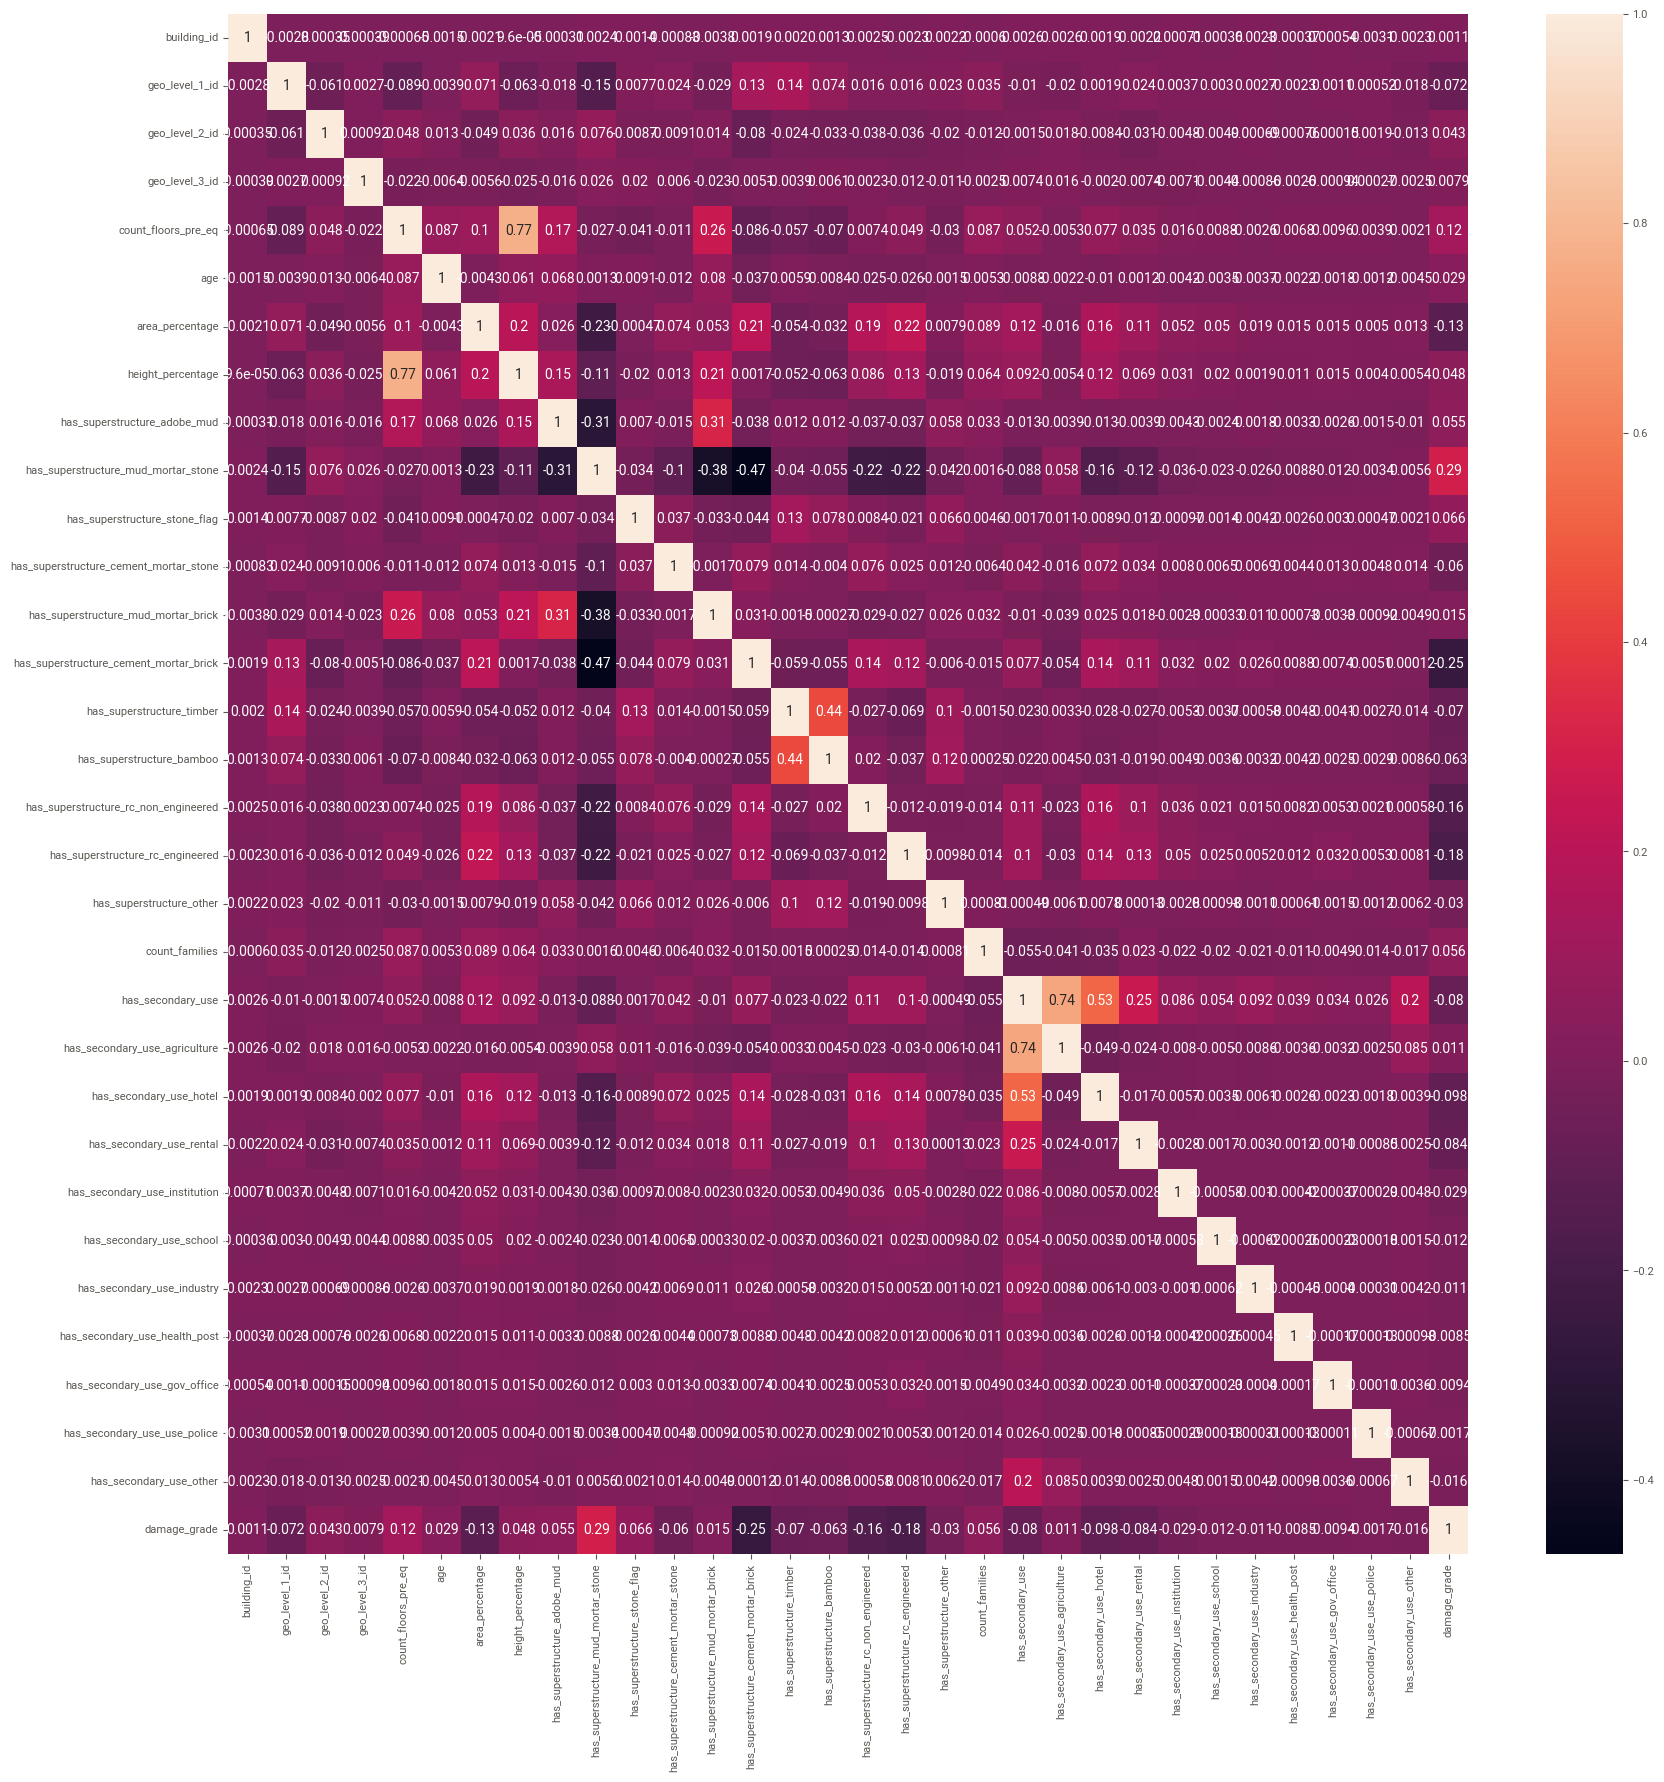

In [40]:
plt.figure(figsize=(20,20),facecolor='white')
sns.heatmap(data= df.select_dtypes(exclude='object').corr(),annot=True)
plt.show()

#### Insights of multivariate analysis

There is no corelation between any features.

## Task 2:-

Create a predictive model in such a way that the objective is to predict the ordinal variable “damage_grade”. This column presents the level of damage grade affected by the earthquake.

### Data preprocessing

In [39]:
df.shape

(260601, 40)

In [40]:
X = df.drop(['damage_grade','building_id'], axis=1)
y = df['damage_grade']

In [41]:
cat_col

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size =0.2, random_state=42)

In [43]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
X_train_OH = pd.DataFrame(one_hot_encoder.fit_transform(X_train[cat_col]))
X_test_OH = pd.DataFrame(one_hot_encoder.transform(X_test[cat_col]))


In [44]:
feature_names = one_hot_encoder.get_feature_names_out(input_features=cat_col)
X_train_OH.columns = feature_names
X_test_OH.columns = feature_names

In [45]:
X_train_OH.head(2)

,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
# adding back the index

In [47]:
X_train_OH.index = X_train.index
X_test_OH.index = X_test.index

In [48]:
# Removing categorical column
X_train_num = X_train.drop(cat_col, axis = 1)
X_test_num = X_test.drop(cat_col, axis = 1)

In [49]:
# Concatenate One hot encoded columns
X_train = pd.concat([X_train_num,X_train_OH], axis =1)
X_test = pd.concat([X_test_num,X_test_OH],axis=1)

In [50]:
X_train.head(2)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
170377,13,257,8352,3,25,2,5,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
184895,6,1076,9202,3,40,10,8,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Model Creation

In [53]:
# Logistic regression

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'newton-cg',max_iter=2000)

In [55]:
model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


LogisticRegression(max_iter=2000, solver='newton-cg')

In [56]:
y_predict = model.predict(X_test)

In [58]:
from sklearn.metrics import f1_score, mean_absolute_error
f1score = f1_score(y_test,y_predict,average='micro')
f1score

0.5881122772011281

In [59]:
model = LogisticRegression(solver = 'sag',max_iter=1000)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [60]:
f1score = f1_score(y_test,y_predict,average='micro')
f1score

0.5681395214980526

In [61]:
# Decision Tree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=1,
                                min_samples_split=3,splitter='random',random_state = 43)

In [63]:
DTC.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=3,
                       random_state=43, splitter='random')

In [64]:
y_predict = DTC.predict(X_test)

In [65]:
f1score = f1_score(y_test, y_predict,average='micro')
f1score

0.6596957080639282

In [66]:
# Model 2

In [67]:
DTC = DecisionTreeClassifier(criterion='entropy',max_depth=20,min_samples_leaf=1,
                                min_samples_split=2,splitter='random',random_state = 42)
DTC.fit(X_train, y_train)
y_predict = DTC.predict(X_test)
f1score = f1_score(y_test, y_predict,average='micro')
f1score

0.6805510254983596

In [68]:
DTC = DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=3,
                                min_samples_split=4,splitter='random',random_state = 42)
DTC.fit(X_train, y_train)
y_predict = DTC.predict(X_test)
f1score = f1_score(y_test, y_predict,average='micro')
f1score

0.6889929203200246

In [69]:
DTC = DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=3,
                                min_samples_split=4,splitter='best',random_state = 42)
DTC.fit(X_train, y_train)
y_predict = DTC.predict(X_test)
f1score = f1_score(y_test, y_predict,average='micro')
f1score

0.6939621265900501

In [70]:
DTC = DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=10,
                                min_samples_split=10,splitter='best',random_state = 5)
DTC.fit(X_train, y_train)
y_predict = DTC.predict(X_test)
f1score = f1_score(y_test, y_predict,average='micro')
f1score

0.708294161662286

In [71]:
DTC = DecisionTreeClassifier(criterion='entropy',max_depth=20,min_samples_leaf=10,
                                min_samples_split=10,splitter='random',random_state = 3)
DTC.fit(X_train, y_train)
y_predict = DTC.predict(X_test)
f1score = f1_score(y_test, y_predict,average='micro')
f1score

0.6931371232324782

In [72]:
# Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,f1_score 
rf_clf = RandomForestClassifier(n_estimators=500)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [74]:
y_p=rf_clf.predict(X_train)
f1_score(y_train,y_p,average='micro')

0.9867900997697621

In [75]:
y_predict=rf_clf.predict(X_test)

In [76]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.67      0.47      0.55      5170
           2       0.72      0.83      0.77     29487
           3       0.72      0.60      0.65     17464

    accuracy                           0.72     52121
   macro avg       0.70      0.63      0.66     52121
weighted avg       0.71      0.72      0.71     52121



In [77]:
f_Score=f1_score(y_test,y_predict,average='micro')
f_Score

0.7155081445098904

In [82]:
# Model 2

In [84]:
rf_clf = RandomForestClassifier(n_estimators=500,random_state=42,max_depth=40,min_samples_split=7,criterion='gini',max_features='sqrt',bootstrap=True,min_samples_leaf=1,min_impurity_decrease=0.0,max_samples=None)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=40, min_samples_split=7, n_estimators=500,
                       random_state=42)

In [85]:
y_p=rf_clf.predict(X_train)
f1_score(y_train,y_p,average='micro')

0.9011559861857253

In [86]:
y_predict=rf_clf.predict(X_test)

In [87]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.71      0.45      0.55      5170
           2       0.72      0.86      0.78     29487
           3       0.75      0.58      0.66     17464

    accuracy                           0.73     52121
   macro avg       0.73      0.63      0.66     52121
weighted avg       0.73      0.73      0.72     52121



In [88]:
f_Score=f1_score(y_test,y_predict,average='micro')
f_Score

0.7255616737975097

In [52]:
# Model 3

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,f1_score 
rf_clf = RandomForestClassifier(n_estimators=500,random_state=42,max_depth=25,min_samples_split=5,max_features='sqrt')
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=5, n_estimators=500,
                       random_state=42)

In [61]:
y_p=rf_clf.predict(X_train)
f1_score(y_train,y_p,average='micro')

0.8298062164236377

In [62]:
y_predict=rf_clf.predict(X_test)

In [63]:
f_Score=f1_score(y_test,y_predict,average='micro')
f_Score

0.7140691851652885

In [ ]:
print(classification_report(y_test,y_predict))

In [78]:
# KNN

In [94]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 1)

In [95]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [96]:
y_pred = KNN.predict(X_test)

In [97]:
accuracy_score(y_pred, y_test)

0.6676579497707258

In [98]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.49      0.53      0.51      4745
           2       0.72      0.72      0.72     29754
           3       0.63      0.62      0.62     17622

    accuracy                           0.67     52121
   macro avg       0.61      0.62      0.62     52121
weighted avg       0.67      0.67      0.67     52121



In [117]:
f_Score=f1_score(y_test,y_pred,average='micro')
f_Score

0.7074499721801193

In [ ]:
from sklearn.ensemble import BaggingClassifier #import bagging 

KNN1=KNeighborsClassifier() ## model object creation
KNN1.fit(X_train,y_train)  ## fitting the model
y_hat_knn=KNN1.predict(X_test) 

## model object creation
model_bagg1=BaggingClassifier(base_estimator=KNN1,n_estimators=500, max_samples=0.5, max_features=0.75) 

## fitting the model
model_bagg1.fit(X_train,y_train) 

## getting the prediction
y_hat_bagg=model_bagg1.predict(X_test) 

# testing score:
f1_score(y_test,y_hat_bagg,average='micro') 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
# Gradient Boost

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,f1_score 

gbm=GradientBoostingClassifier() ## object creation
gbm.fit(X_train,y_train) ## fitting the data
y_gbm=gbm.predict(X_test)#predicting the price

#testing score:
f1_score(y_test,y_gbm,average='micro') 

0.6809923063640375

In [54]:
y_pre_g=gbm.predict(X_train)
f1_score(y_train,y_pre_g,average='micro') 

0.6817008825786646

In [80]:
# XGBoost

In [68]:
y_train

170377    2
184895    2
26740     3
198210    2
254313    3
         ..
259178    3
103694    3
131932    2
146867    3
121958    2
Name: damage_grade, Length: 208480, dtype: int64

In [69]:
from xgboost import XGBClassifier

xgb = XGBClassifier() 
y_train_adjusted = y_train -1
xgb.fit(X_train, y_train_adjusted)
y_hat=xgb.predict(X_test)

f1_score(y_test,y_hat,average='micro') 

0.11926095048061242

In [70]:
X_test.shape

(52121, 68)

In [71]:
X_train.shape

(208480, 68)

#### Ordianl Encoding

In [63]:
from sklearn.preprocessing import OrdinalEncoder

In [64]:
ordinal_encoder = OrdinalEncoder()

In [65]:
cat_col

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

In [66]:
X = df.drop(['damage_grade','building_id'], axis=1)
y = df['damage_grade']

from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size =0.2, random_state=42)


X_train[cat_col] = ordinal_encoder.fit_transform(X_train[cat_col])
X_test[cat_col] = ordinal_encoder.transform(X_test[cat_col])

In [71]:
# Logistic regression

In [72]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'newton-cg',max_iter=2000)

In [73]:
model.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


LogisticRegression(max_iter=2000, solver='newton-cg')

In [75]:
y_predict = model.predict(X_test)
F1_Score = f1_score(y_test,y_predict, average='micro') 
F1_Score

0.5810134111010917

In [74]:
# Model 2

In [77]:
model = LogisticRegression(solver = 'sag',max_iter=2000)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

F1_Score = f1_score(y_test,y_predict, average='micro') 
F1_Score

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.568177893747242

In [78]:
# Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,f1_score 

In [81]:
DTC = DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=1,
                                min_samples_split=3,splitter='random',random_state = 43)
DTC.fit(X_train, y_train)
y_predict = DTC.predict(X_test)
f1score = f1_score(y_test, y_predict,average='micro')
f1score

0.655647435774448

In [83]:
# Model 2

In [82]:
DTC = DecisionTreeClassifier(criterion='entropy',max_depth=20,min_samples_leaf=1,
                                min_samples_split=2,splitter='random',random_state = 42)
DTC.fit(X_train, y_train)
y_predict = DTC.predict(X_test)
f1score = f1_score(y_test, y_predict,average='micro')
f1score

0.6782486905469964

In [84]:
# Model 3

In [85]:
DTC = DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=10,
                                min_samples_split=10,splitter='best',random_state = 5)
DTC.fit(X_train, y_train)
y_predict = DTC.predict(X_test)
f1score = f1_score(y_test, y_predict,average='micro')
f1score

0.705224381727135

In [86]:
# Model 4

In [87]:
DTC = DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=3,
                                min_samples_split=4,splitter='best',random_state = 42)
DTC.fit(X_train, y_train)
y_predict = DTC.predict(X_test)
f1score = f1_score(y_test, y_predict,average='micro')
f1score

0.693463287350588

In [88]:
## Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,f1_score 
rf_clf = RandomForestClassifier(n_estimators=500)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [91]:
y_predict=rf_clf.predict(X_test)
f1score = f1_score(y_test, y_predict,average='micro')
f1score

0.7227221273574951

In [90]:
# Model 2

In [92]:
rf_clf = RandomForestClassifier(n_estimators=500,random_state=42,max_depth=40,min_samples_split=7,criterion='gini',max_features='sqrt',bootstrap=True,min_samples_leaf=1,min_impurity_decrease=0.0,max_samples=None)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=40, min_samples_split=7, n_estimators=500,
                       random_state=42)

In [93]:
y_predict=rf_clf.predict(X_test)
f1score = f1_score(y_test, y_predict,average='micro')
f1score

0.7319506532875425

In [100]:
# Model 3

In [101]:
rf_clf = RandomForestClassifier(n_estimators=500,random_state=42,max_depth=25,min_samples_split=5,max_features='sqrt')
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=5, n_estimators=500,
                       random_state=42)

In [102]:
y_predict=rf_clf.predict(X_test)
f1score = f1_score(y_test, y_predict,average='micro')
f1score

0.7233168972199304

In [103]:
## KNN

In [108]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 1)

KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
f1score = f1_score(y_test, y_pred,average='micro')
f1score

0.6676579497707258

In [105]:
# Model 2

In [109]:
KNN = KNeighborsClassifier(n_neighbors = 8)

KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
f1score = f1_score(y_test, y_pred,average='micro')
f1score

0.7083709061606646

In [110]:
# Model 3

In [112]:
KNN = KNeighborsClassifier(n_neighbors = 10)

KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
f1score = f1_score(y_test, y_pred,average='micro')
f1score

0.7089848621476947

In [118]:
# Gradient boost

In [119]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,f1_score 

gbm=GradientBoostingClassifier() ## object creation
gbm.fit(X_train,y_train) ## fitting the data
y_gbm=gbm.predict(X_test)#predicting the price

#testing score:
f1_score(y_test,y_gbm,average='micro') 

0.6817213790986358

In [120]:
# XGBoost

In [123]:
from xgboost import XGBClassifier

xgb = XGBClassifier() 
y_train_adjusted = y_train -1
xgb.fit(X_train, y_train_adjusted)
y_hat=xgb.predict(X_test)

f1_score(y_test,y_hat,average='micro') 

0.11995165096602137

## Task3:- 

Suggestions to the Seismologists to avoid  earthquake event leading  to significant damage in many buildings



In [52]:
data1 = df.groupby(['damage_grade','height_percentage','count_floors_pre_eq'])
d = data1.first()
pd.set_option('display.max_row',None)
d

building_id  \
damage_grade height_percentage count_floors_pre_eq                
1            2                 1                         866259   
                               2                        1025352   
                               7                         255374   
             3                 1                         440102   
                               2                          76950   
                               3                         219449   
             4                 1                         989500   
                               2                         933242   
                               3                         145430   
             5                 1                         960207   
                               2                         358013   
                               3                         328332   
                               9                         613451   
             6                 1                         835546   
                               2                         475515   
                               3                          94919   
                               4                         776695   
             7                 1                         529168   
                               2                         425720   
                               3                          72972   
                               4                         242928   
             8                 1                         866947   
                               2                         864809   
                               3                         823727   
                               4                         347769   
                               5                         103446   
             9                 2                         934906   
                               3                         747500   
                               4                         274193   
                               5                         839640   
             10                2                         533189   
                               3                         799072   
                               4                        1024429   
                               5                         298970   
             11                2                         819892   
                               3                         956645   
                               4                         227144   
                               5                         649572   
             12                3                         644794   
                               4                         766746   
                               5                         501025   
             13                3                        1040830   
                               4                          15665   
                               5                         936196   
             14                3                         958104   
                               4                         338171   
                               5                         988223   
             15                2                         443489   
                               4                        1049245   
                               5                         849250   
                               6                         570721   
             16                3                         341651   
                               4                         798886   
                               5                          31322   
                               6                         926697   
             17                5                         276029   
             18                4                         150204   
                               5                          50134   
                               6

In [ ]:
df[df.loc[df['damage_grade']==3]].value

In [52]:
features = df.drop(['damage_grade','building_id'],axis=1).columns
df['damage_grade'].unique()

array([3, 2, 1], dtype=int64)

C:\Users\samee\AppData\Local\Temp\ipykernel_19656\2829052712.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Text(0.5, 1.0, 'Heatmap of Deposit Variable Correlations')

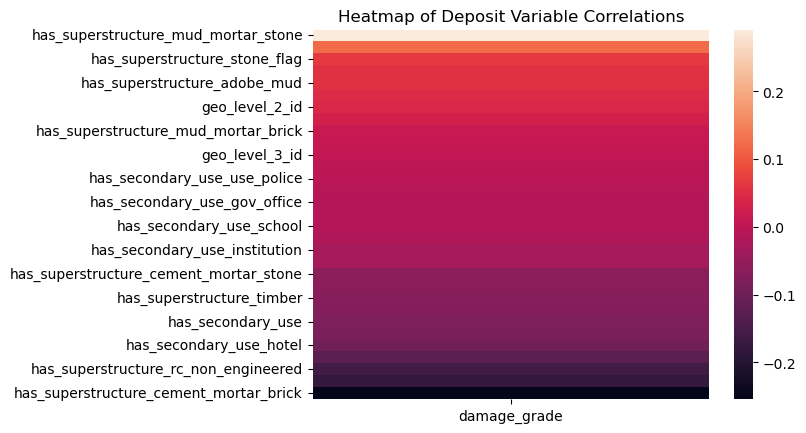

In [60]:
DEPOSIT_COLUMN = 'damage_grade'
correlation_matrix = df.corr()

deposit_correlation_column = pd.DataFrame(correlation_matrix[DEPOSIT_COLUMN].drop(DEPOSIT_COLUMN))
deposit_correlation_column = deposit_correlation_column.sort_values(by=DEPOSIT_COLUMN, ascending=False)
sns.heatmap(deposit_correlation_column)
plt.title('Heatmap of Deposit Variable Correlations')



### Scaling

In [55]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_X_train # array

array([[-0.11102274, -1.07752235,  0.57473361, ..., -0.07560748,
         0.19596467, -0.10188732],
       [-0.98287355,  0.90793438,  0.80781526, ..., -0.07560748,
         0.19596467, -0.10188732],
       [-0.85832343,  0.33096405,  1.22489432, ..., -0.07560748,
        -5.10296066,  9.81476431],
       ...,
       [-0.73377332,  0.90066165, -0.27615153, ..., -0.07560748,
         0.19596467, -0.10188732],
       [-0.48467308, -1.51631071, -1.21067186, ..., -0.07560748,
         0.19596467, -0.10188732],
       [-0.85832343,  0.1079335 ,  1.19198867, ..., -0.07560748,
         0.19596467, -0.10188732]])

In [56]:
X_train=pd.DataFrame(data=scaled_X_train, columns= X_train.columns)
X_test=pd.DataFrame(data=scaled_X_test, columns= X_test.columns)

In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'newton-cg',max_iter=2000)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [58]:
from sklearn.metrics import f1_score, mean_absolute_error
f1score = f1_score(y_test,y_predict,average='micro')
f1score

0.5881890216995069

In [59]:
X_train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,-0.111023,-1.077522,0.574734,1.196103,-0.020259,-1.369184,-0.226463,3.211611,-1.790348,-0.188,-0.136329,-0.270117,-0.285406,-0.584396,-0.305072,-0.210067,-0.126762,-0.123379,0.038141,-0.354536,-0.262255,-0.186229,-0.089508,-0.03145,-0.018196,-0.033377,-0.013853,-0.011997,-0.008483,-0.072195,2.522733,-0.181503,-2.227904,-0.073888,-0.20552,0.434106,-0.240341,-0.248137,0.651582,-0.555757,-0.257204,0.492591,-0.044282,-0.322305,-0.324775,-0.061675,-0.425853,-1.317394,-0.219153,2.239653,-0.231194,-0.095597,0.538445,-0.444472,-0.031143,-0.0352,-4.883506,-0.009795,-0.013502,-0.012582,-0.025171,6.725802,-0.036343,-0.119247,-0.146544,-0.075607,0.195965,-0.101887
1,-0.982874,0.907934,0.807815,1.196103,0.184847,0.452923,1.338350,-0.311370,0.558551,-0.188,-0.136329,-0.270117,-0.285406,-0.584396,-0.305072,-0.210067,-0.126762,-0.123379,-2.356188,2.820587,-0.262255,-0.186229,11.172186,-0.03145,-0.018196,-0.033377,-0.013853,-0.011997,-0.008483,-0.072195,-0.396395,5.509545,-2.227904,-0.073888,-0.20552,0.434106,-0.240341,-0.248137,0.651582,-0.555757,-0.257204,0.492591,-0.044282,-0.322305,-0.324775,-0.061675,-0.425853,0.759074,-0.219153,-0.446498,-0.231194,-0.095597,-1.857199,2.249861,-0.031143,-0.0352,0.204771,-0.009795,-0.013502,-0.012582,-0.025171,-0.148681,-0.036343,-0.119247,-0.146544,-0.075607,0.195965,-0.101887
2,-0.858323,0.330964,1.224894,-0.177786,0.253216,-0.002603,-0.226463,-0.311370,0.558551,-0.188,-0.136329,-0.270117,-0.285406,-0.584396,-0.305072,-0.210067,-0.126762,-0.123379,0.038141,-0.354536,-0.262255,-0.186229,-0.089508,-0.03145,-0.018196,-0.033377,-0.013853,-0.011997,-0.008483,-0.072195,-0.396395,-0.181503,0.448852,-0.073888,-0.20552,0.434106,-0.240341,-0.248137,0.651582,-0.555757,-0.257204,0.492591,-0.044282,-0.322305,-0.324775,-0.061675,-0.425853,0.759074,-0.219153,-0.446498,-0.231194,-0.095597,0.538445,-0.444472,-0.031143,-0.0352,0.204771,-0.009795,-0.013502,-0.012582,-0.025171,-0.148681,-0.036343,-0.119247,-0.146544,-0.075607,-5.102961,9.814764
3,-0.858323,-0.355097,-0.957847,-0.177786,0.048109,-0.230367,-0.748067,-0.311370,0.558551,-0.188,7.335221,-0.270117,-0.285406,-0.584396,-0.305072,-0.210067,-0.126762,-0.123379,0.038141,-0.354536,-0.262255,-0.186229,-0.089508,-0.03145,-0.018196,-0.033377,-0.013853,-0.011997,-0.008483,-0.072195,-0.396395,-0.181503,0.448852,-0.073888,-0.20552,0.434106,-0.240341,-0.248137,0.651582,-0.555757,-0.257204,-2.030080,-0.044282,3.102649,-0.324775,-0.061675,-0.425853,0.759074,-0.219153,-0.446498,-0.231194,-0.095597,0.538445,-0

### ANN

In [57]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes = (50,3), learning_rate_init = 0.001, max_iter = 200, random_state = 42)   # 2 hidden layers
model.fit(X_train, y_train) # training data
y_predict_proba = model.predict_proba(X_test)  # predicting the probability
y_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)


In [62]:
# Evaluating the model created
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
print("Train accuracy: ", accuracy_score(y_train, y_train_predict))
print("Test accuracy : ", accuracy_score(y_test, y_predict))

Train accuracy:  0.5697045280122793
Test accuracy :  0.5657220697991213


In [63]:
f1score = f1_score(y_test, y_predict,average='micro')
f1score

0.5657220697991213

In [64]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.57      0.72     52119
           3       0.00      0.00      0.00         2

    accuracy                           0.57     52121
   macro avg       0.33      0.19      0.24     52121
weighted avg       1.00      0.57      0.72     52121



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
## Min max scaler

In [66]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()     # convert values between 0 and 1 - Normalization
dl = ['damage_grade']  # descrite features

scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)

X_train=pd.DataFrame(data=scaled_X_train, columns= X_train.columns)
X_test=pd.DataFrame(data=scaled_X_test, columns= X_test.columns)

In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'newton-cg',max_iter=2000)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [68]:
from sklearn.metrics import f1_score, mean_absolute_error
f1score = f1_score(y_test,y_predict,average='micro')
f1score

0.5881122772011281

In [69]:
### Random forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,f1_score 
rf_clf = RandomForestClassifier(n_estimators=500)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [71]:
y_predict=rf_clf.predict(X_test)
f1score = f1_score(y_test, y_predict,average='micro')
f1score

0.7158343086280002

In [ ]:
## 

In [73]:
cat_col

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

In [80]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_df = scaler.fit_transform(df.drop(cat_col, axis=1))

scaled_columns = df.drop(cat_col, axis=1).columns
df_scaled = pd.DataFrame(data=scaled_df, columns=scaled_columns)

Text(0.5, 1.0, 'Heatmap of Damage grade Correlations')

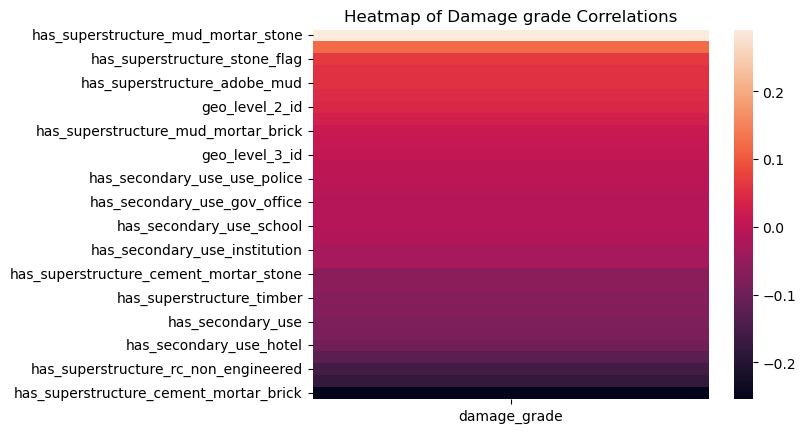

In [81]:
correlation_matrix = df_scaled.corr()

deposit_correlation_column = pd.DataFrame(correlation_matrix['damage_grade'].drop('damage_grade'))
deposit_correlation_column = deposit_correlation_column.sort_values(by='damage_grade', ascending=False)
sns.heatmap(deposit_correlation_column)
plt.title('Heatmap of Damage grade Correlations')

In [ ]:
import sweetviz as sv
feature_config = sv.FeatureConfig(skip='building_id', force_num='damage_grade') #force_text =[' ']
my_report = sv.compare_intra(df,df['has_superstructure_mud_mortar_stone']==1,['Yes','No'],'damage_grade',feature_config)
my_report.show_notebook()
my_report.show_html()

In [ ]:
df_damage_grade_3 = df[df['damage_grade'] == 3]

# Group by 'has_super_structure_mud_mortar_stone' and count occurrences
counts = df_damage_grade_3['has_superstructure_mud_mortar_stone'].value_counts().reset_index()
counts.columns = ['has_superstructure_mud_mortar_stone', 'count']

# Plotting the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='has_superstructure_mud_mortar_stone', y='count', data=counts)
plt.xlabel('Has Super Structure Mud Mortar Stone')
plt.ylabel('Count')
plt.title('Counts of Has Super Structure Mud Mortar Stone for Damage Grade 3')
plt.show()